# MOVIE RECOMMENDERSYSTEMCertification Project

In [77]:
#Importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import difflib

# 1.Create a popularity-basedrecommender system at a genre level.
The userwill input a genre (g),
minimum ratingthreshold (t)
for a movie,and no. ofrecommendations(N)
for which it should berecommended top N movies which are most popular within that genre (g) 
ordered by ratings in descending order where each movie has at least (t) reviews.

In [2]:
#read data
movie = pd.read_csv('movies.csv')
m = pd.DataFrame(movie)
m.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [3]:
#read 2 data
rating = pd.read_csv('ratings.csv')
r = pd.DataFrame(rating)
r.head(2)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807


In [4]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [6]:
data = pd.merge(m,r,on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [8]:
#from task 

genere = input('Generes choice (g)')
min_review = int(input('min_rewiew of moive (t)'))
num_recommend = int(input('num of (n)'))

Generes choice (g)Adventure
min_rewiew of moive (t)100
num of (n)5


In [9]:
movie_C = data[data['genres'].str.contains(genere, case=False)]
movie_C.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [10]:
#from task avg ratings and num of reviews for each 
movie_stats = movie_C.groupby('movieId').agg({'rating': ['mean','count']})
movie_stats.columns = ['avg_rating','num_reviews']
movie_stats.head()

,avg_rating,num_reviews
movieId,,
1,3.907328,232
2,3.353261,92
8,3.666667,3
10,3.600000,135
13,3.437500,8


In [11]:
#filtering
filter_movie = movie_stats[movie_stats['num_reviews'] >= min_review]
filter_movie.head()

,avg_rating,num_reviews
movieId,,
1,3.907328,232
10,3.600000,135
95,3.096330,109
150,3.969543,197
153,2.964968,157


In [12]:
#sort movies
sorted_movie = filter_movie.sort_values('avg_rating',ascending=False)
sorted_movie.head()

,avg_rating,num_reviews
movieId,,
1136,4.301948,154
1196,4.228070,228
1198,4.212054,224
260,4.188645,273
1197,4.163743,171


In [13]:
recommends = sorted_movie.head(num_recommend)
recommends.head()

,avg_rating,num_reviews
movieId,,
1136,4.301948,154
1196,4.228070,228
1198,4.212054,224
260,4.188645,273
1197,4.163743,171


In [14]:
#merge recommend and movie data set
recomend_movie = pd.merge(recommends,data,on='movieId')
recomend_movie.head()

,movieId,avg_rating,num_reviews,title,genres,userId,rating,timestamp
0,1136,4.301948,154,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,1,5.0,1217897630
1,1136,4.301948,154,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,7,5.0,1322062989
2,1136,4.301948,154,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,11,4.0,850817072
3,1136,4.301948,154,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,15,4.0,1447478232
4,1136,4.301948,154,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,17,5.0,1235222053


In [15]:
recomend_movie.reset_index(drop=True,inplace=True)
recomend_movie.index += 1
recomend_movie = recomend_movie.rename(columns={'index':'S.No'})

In [16]:
#to display recommend movies
recomend_movie = recomend_movie[['title','avg_rating','num_reviews']]
print(recomend_movie)

                                       title  avg_rating  num_reviews
1     Monty Python and the Holy Grail (1975)    4.301948          154
2     Monty Python and the Holy Grail (1975)    4.301948          154
3     Monty Python and the Holy Grail (1975)    4.301948          154
4     Monty Python and the Holy Grail (1975)    4.301948          154
5     Monty Python and the Holy Grail (1975)    4.301948          154
...                                      ...         ...          ...
1046              Princess Bride, The (1987)    4.163743          171
1047              Princess Bride, The (1987)    4.163743          171
1048              Princess Bride, The (1987)    4.163743          171
1049              Princess Bride, The (1987)    4.163743          171
1050              Princess Bride, The (1987)    4.163743          171

[1050 rows x 3 columns]


In [17]:
pd.DataFrame(recomend_movie)

,title,avg_rating,num_reviews
1,Monty Python and the Holy Grail (1975),4.301948,154
2,Monty Python and the Holy Grail (1975),4.301948,154
3,Monty Python and the Holy Grail (1975),4.301948,154
4,Monty Python and the Holy Grail (1975),4.301948,154
5,Monty Python and the Holy Grail (1975),4.301948,154
...,...,...,...
1046,"Princess Bride, The (1987)",4.163743,171
1047,"Princess Bride, The (1987)",4.163743,171
1048,"Princess Bride, The (1987)",4.163743,171
1049,"Princess Bride, The (1987)",4.163743,171


# 2.Create a content-based recommender system thatrecommends top N movies based on similar movie(m) genres.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
#read data
r.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [20]:
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
#from task
target_user = int(input('user id '))
num_recomend = int(input('recommend n '))
similar_user = int(input('users '))

user id 1
recommend n 6
users 80


In [22]:
#filter data
target_user_rating = r[r['userId']==target_user]
target_user_rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [24]:
user_rating = r.pivot(index='userId',columns='movieId' ,values='rating').fillna(0)
user_sml = cosine_similarity(user_rating)
user_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
user_sml

array([[1.        , 0.10111327, 0.21004361, ..., 0.2386603 , 0.27821676,
        0.15347851],
       [0.10111327, 1.        , 0.11555911, ..., 0.05142323, 0.03590744,
        0.06481608],
       [0.21004361, 0.11555911, 1.        , ..., 0.08094014, 0.15894346,
        0.10964798],
       ...,
       [0.2386603 , 0.05142323, 0.08094014, ..., 1.        , 0.12325229,
        0.15836814],
       [0.27821676, 0.03590744, 0.15894346, ..., 0.12325229, 1.        ,
        0.11095479],
       [0.15347851, 0.06481608, 0.10964798, ..., 0.15836814, 0.11095479,
        1.        ]])

In [26]:
#top k simil user
similar_usr_inds = user_sml[target_user - 1].argsort()[::-1][1:similar_user + 1]
similar_usr_inds

array([347, 505, 492, 157, 632, 590, 194, 357,  29, 118, 527, 627, 167,
       402, 373, 229,  78, 568, 573,  87, 261,   6, 121, 160, 610, 112,
       269, 585, 548, 404, 609,  68,  86, 327, 298, 338, 249, 201, 386,
        88, 382,  73, 401, 158, 566, 227,  84, 285, 235, 233, 272, 260,
       162, 277,  16, 475, 109, 589, 459, 541, 579, 540, 176, 303, 408,
        43, 106, 168, 422, 658, 307, 346, 531, 426, 334, 148, 202, 293,
       560, 512], dtype=int64)

In [27]:
siml_usr_rate = user_rating.iloc[similar_usr_inds]
siml_user_movie = siml_usr_rate.columns[user_rating.loc[target_user]==0]
siml_usr_rate.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
userId,,,,,,,,,,,,,,,,,,,,,
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
493,3.5,3.5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,4.5,4.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
633,4.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
siml_user_movie

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            144482, 144656, 144976, 146344, 146656, 146684, 146878, 148238,
            148626, 149532],
           dtype='int64', name='movieId', length=10212)

In [29]:
#calculate movie recommend
recommendations = pd.DataFrame(siml_usr_rate[siml_user_movie].mean().sort_values(ascending=False))
recommendations.columns = ['average_rating']
recommendations.index.name = 'movieId'
recommendations.head()

,average_rating
movieId,
1291,2.71875
4226,2.63750
1,2.60625
1036,2.49375
1200,2.47500


In [30]:
#merge with data set
recommendations = pd.merge(recommendations,m,on='movieId').head(num_recomend)
recommendations.head()

,movieId,average_rating,title,genres
0,1291,2.71875,Indiana Jones and the Last Crusade (1989),Action|Adventure
1,4226,2.63750,Memento (2000),Mystery|Thriller
2,1,2.60625,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1036,2.49375,Die Hard (1988),Action|Crime|Thriller
4,1200,2.47500,Aliens (1986),Action|Adventure|Horror|Sci-Fi


In [31]:
print(m.columns)

Index(['movieId', 'title', 'genres'], dtype='object')


In [34]:
#recommend movie

print("recommended movies: ")
for i, row in recommendations.iterrows():
    print( f"{i+1}.  {row['title']}" )

recommended movies: 
1.  Indiana Jones and the Last Crusade (1989)
2.  Memento (2000)
3.  Toy Story (1995)
4.  Die Hard (1988)
5.  Aliens (1986)
6.  Terminator, The (1984)


# 3.Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u”

In [35]:
import ipywidgets as wd
import difflib
import seaborn as sns


In [37]:
#load data
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
r.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [40]:
movie_data_ = pd.merge(m,r,on='movieId',how='inner')

In [122]:
#Merged both data
movie_data_.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [123]:
movie_data_.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [124]:
#exploratry data analysis

In [125]:
t1 = movie_data_.groupby('title')['title'].count().sort_values(ascending=False)
t1

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
                                            ... 
Kind Lady (1935)                               1
Killing of Sister George, The (1968)           1
Killing Season (2013)                          1
Killer Klowns from Outer Space (1988)          1
À nous la liberté (Freedom for Us) (1931)      1
Name: title, Length: 10323, dtype: int64

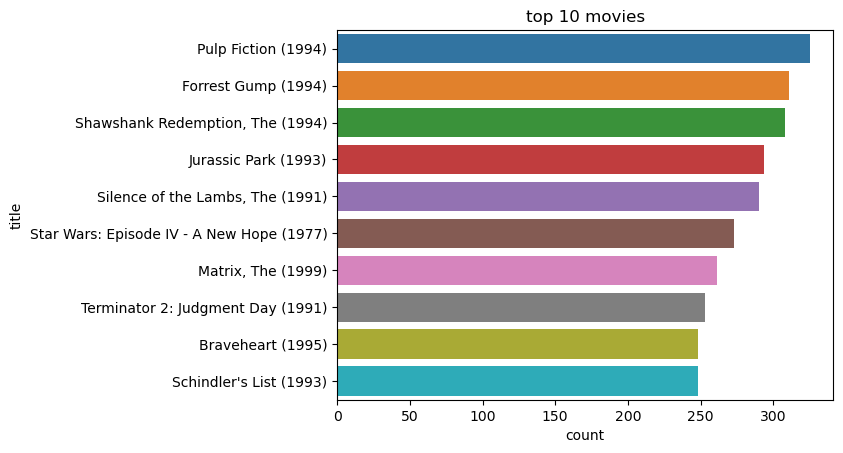

In [126]:
# count top10 movies
sns.barplot(y=t1.index[:10],x=t1.values[:10])
plt.title('top 10 movies')
plt.xlabel('count')
plt.show()

In [127]:
#popolation of user
P1 = movie_data_.groupby('userId')['userId'].count().sort_values(ascending=False)
P1

userId
668    5678
575    2837
458    2086
232    1421
310    1287
       ... 
58       20
51       20
288      20
388      20
257      20
Name: userId, Length: 668, dtype: int64

In [128]:
indices = []
for i in P1.index[:10]:
    indices.append(str(i))

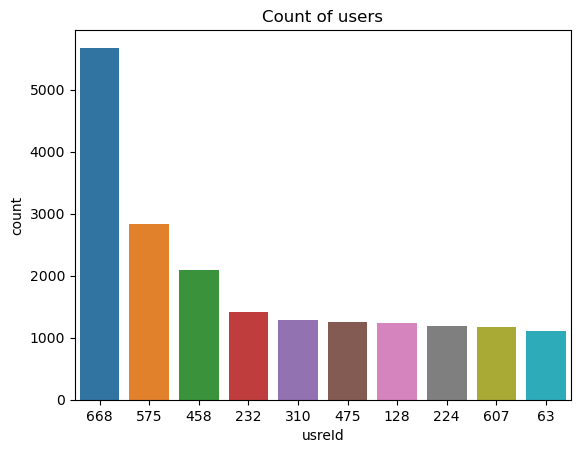

In [129]:
#count top10 users
sns.barplot(x=indices,y=P1.values[:10])
plt.title('Count of users')
plt.xlabel('usreId')
plt.ylabel('count')
plt.show()

In [130]:
#count of genres
g1 = movie_data_.groupby('genres')['genres'].count().sort_values(ascending=False)
g1

genres
Drama                                               7678
Comedy                                              6676
Comedy|Romance                                      3733
Drama|Romance                                       3407
Comedy|Drama                                        3101
                                                    ... 
Documentary|Sci-Fi                                     1
Adventure|Animation                                    1
Action|Romance|War                                     1
Action|IMAX                                            1
Adventure|Fantasy|Horror|Romance|Sci-Fi|Thriller       1
Name: genres, Length: 938, dtype: int64

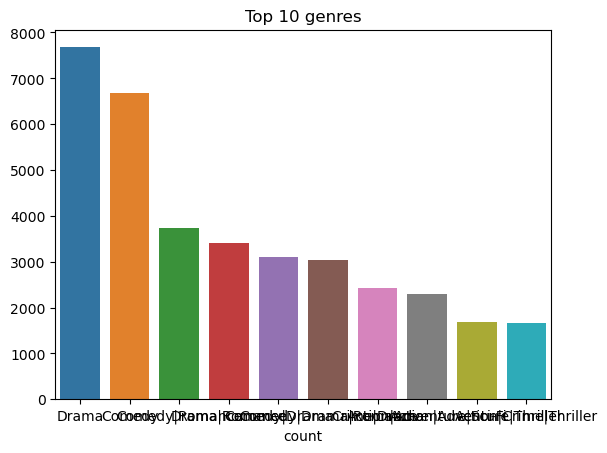

In [131]:
#count of top10 genres
sns.barplot(x=g1.index[:10],y=g1.values[:10])
plt.title('Top 10 genres')
plt.xlabel('count')
plt.show()

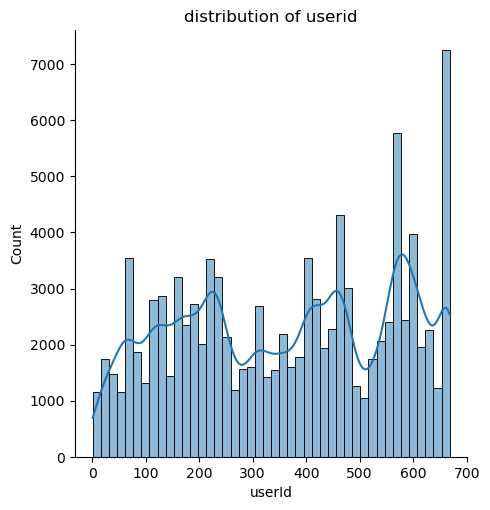

In [132]:
#distrubation of user Id
sns.displot(movie_data_['userId'],kde=True)
plt.title('distribution of userid')
plt.show()

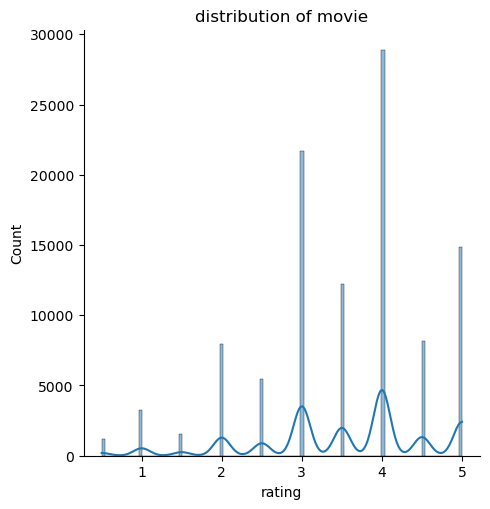

In [133]:
#distribution of movie
sns.displot(movie_data_['rating'],kde=True)
plt.title('distribution of movie')
plt.show()

In [134]:
#averege rating and total movies in genre
avm = movie_data_.groupby('genres').agg({'rating':'mean','title':'count'})
avm.columns = ['average_rating','total_movie']
avm = avm.sort_values(by=['average_rating','total_movie'],ascending=False)
avm

,average_rating,total_movie
genres,,
Adventure|Comedy|Drama|Fantasy|Mystery|Sci-Fi|Thriller,5.0,2
Animation|Fantasy|Sci-Fi|Thriller,5.0,2
Action|Adventure|Comedy|Crime|Romance|Thriller,5.0,1
Action|Animation|Crime|Sci-Fi,5.0,1
Action|Comedy|Drama|Romance,5.0,1
...,...,...
Children|Comedy|Drama|Musical|Romance,0.5,2
Adventure|Drama|Romance|Sci-Fi|Thriller,0.5,1
Children|Comedy|Crime,0.5,1


# 3differenttypesofrecommendationmodulesasmentionedinthe objectives.

In [135]:
#movie recommendation sys with user inter
genre = widgets.Text(description='Genre:')
min_rev = widgets.IntText(description='min review:')
num_recomd_ = widgets.IntText(description='recommendation count')
input_1 = widgets.VBox([genre,min_rev,num_recomd_])
botton_1 = widgets.Button(description='get info')
interface_1 = widgets.HBox([input_1,botton_1])

In [136]:
#algorithms and func
def algo_mode_1(response):
    try:
        closest_match = difflib.get_close_matches(response[0],movie_data_.genres.unique())[0]
        closest_genre_md = movie_data_[movie_data_['genres']==closest_match]
        rev_grpby = closest_genre_md.groupby('title').agg({'rating':['mean','count']})
        rev_grpby.columns = ['avg_ratings','count_ratings']
        min_rev_grp = rev_grpby[rev_grpby['count_ratings']>=response[1]]
        sort_rev_grpby = min_rev_grp.sort_values(by='avg_ratings',ascending=False)
        top_n_recomd = sort_rev_grpby.head(response[2])
        return top_n_recomd
    except Exception as e:
        return e
        

In [137]:
#function for button
def button_1_click(b):
    response = [genre.value,min_rev.value,num_recomd_.value]
    print(algo_mode_1(response))
    

In [138]:
#adding function to butten
b= botton_1.on_click(button_1_click)

In [140]:
#final system
interface_1

                                     avg_ratings  count_ratings
title                                                          
Clerks (1994)                           3.980198            101
Ferris Bueller's Day Off (1986)         3.960938            128
Monty Python's Life of Brian (1979)     3.810680            103
Birdcage, The (1996)                    3.551887            106
Ace Ventura: Pet Detective (1994)       2.849711            173


# Designthe3differenttypesofrecommendationmodulesasmentionedinthe objectives.

In [143]:
#algorithm 2
def algo_2(response):
    try:
        responce[0] = responce[0]+' '+'()'
        close_movie = difflib.get_close_matches(response(0),movie_data_.title.unique())[0]
        genre = movie_data_[movie_data_['title']==close_movie]['genres']
        close_genr_md = movie_data_[movie_data_['genres']==genre.values[0]]['title'].reset_index(drop=True)
        top_n_recomnd = close_genr_md[:response[1]]
        sr_no = []
        m=1
        for i in range(len(top_n_recomnd)):
            sr_no.append(m)
            m+=1
            return pd.DataFrame({'sr_no.':sr_no,'movies':top_n_recomnd})
    except Exception as e:
            return r

In [146]:
#building user interface
movie = widgets.Text(description='movie:')
num_recomd_2 = widgets.IntText(description='no of movies:')
input_2 = widgets.VBox([movie,num_recomd_2])
button = widgets.Button(description='get info')
interface_2 = widgets.HBox([input_2,button])

In [148]:
#function on
def button_2_click(b):
    response = [movie.value,num_recomd_2.value]
    print(algo_2(response))

In [149]:
b = button.on_click(button_2_click)

In [150]:
interface_2

        userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]
        userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
10533